In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [30]:
print train.shape

(614, 13)


In [3]:
test = pd.read_csv('test.csv')

In [32]:
print test.shape

(367, 12)


In [33]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [34]:
print "Column Name \t  Missing values"
for i in train.columns:
    print i," \t ",train[i].shape[0] - train[i].dropna().shape[0]

Column Name 	  Missing values
Loan_ID  	  0
Gender  	  13
Married  	  3
Dependents  	  15
Education  	  0
Self_Employed  	  32
ApplicantIncome  	  0
CoapplicantIncome  	  0
LoanAmount  	  22
Loan_Amount_Term  	  14
Credit_History  	  50
Property_Area  	  0
Loan_Status  	  0


In [35]:
print "Column Name \t  Missing values"
for i in test.columns:
    print i," \t ",test[i].shape[0] - test[i].dropna().shape[0]

Column Name 	  Missing values
Loan_ID  	  0
Gender  	  11
Married  	  0
Dependents  	  10
Education  	  0
Self_Employed  	  23
ApplicantIncome  	  0
CoapplicantIncome  	  0
LoanAmount  	  5
Loan_Amount_Term  	  6
Credit_History  	  29
Property_Area  	  0


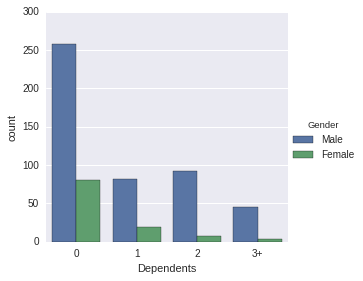

In [37]:
sns.factorplot(x = 'Dependents',hue='Gender',kind='count',data=train)

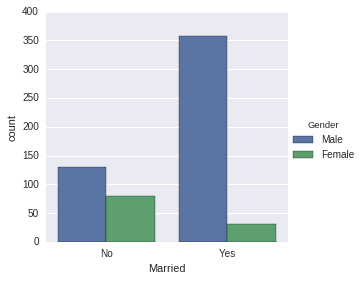

In [38]:
sns.factorplot(x='Married',hue='Gender',kind='count',data=train)

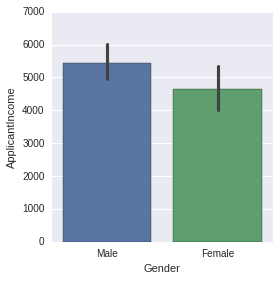

In [39]:
sns.factorplot(x='Gender',y='ApplicantIncome',kind='bar',data=train)

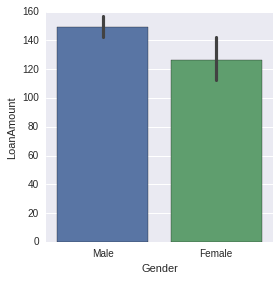

In [40]:
sns.factorplot(x='Gender',y='LoanAmount',kind='bar',data=train)

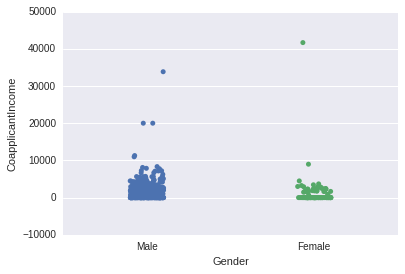

In [41]:
sns.stripplot(x='Gender',y='CoapplicantIncome',data=train,jitter=True)

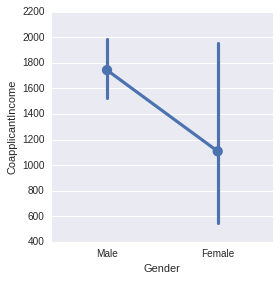

In [42]:
sns.factorplot(x='Gender',y='CoapplicantIncome',data=train)

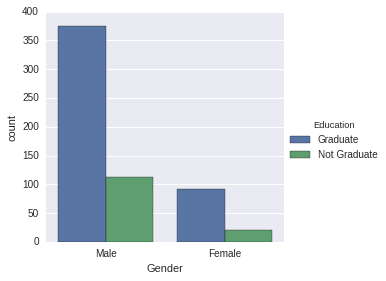

In [148]:
sns.factorplot(x='Gender',hue='Education',data=train,kind='count')

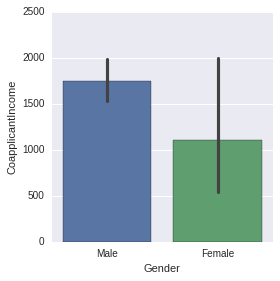

In [43]:
sns.factorplot(x='Gender',y='CoapplicantIncome',kind='bar',data=train)

In [44]:
train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [4]:
def fill_Gender(row):
    if ((row['Dependents'] =='3+') | (row.Married=='Yes') | (row.ApplicantIncome>5000) | (row.CoapplicantIncome>1200)):
        return 'Male'
    else :
        return 'Female'

In [5]:
train.loc[train.Gender.isnull(),'Gender'] = train.loc[train.Gender.isnull(),:].apply(lambda row:fill_Gender(row),axis=1) 

In [50]:
train.Gender.value_counts()

Male      500
Female    114
Name: Gender, dtype: int64

In [21]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
test.loc[test.Gender.isnull(),'Gender'] = test.loc[test.Gender.isnull(),:].apply(lambda row:fill_Gender(row),axis=1) 

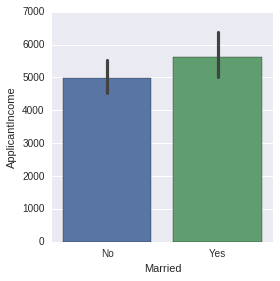

In [14]:
sns.factorplot(x='Married',y = 'ApplicantIncome',data=train,kind='bar')

In [10]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
train[train.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754,160,360,1,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0,158,480,1,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0,NaN,240,1,Semiurban,Y


In [7]:
# mostly income is high enough so replace 3 nan values in Marrried with Yes
train.Married = train.Married.fillna('Yes')

Filling the nan values in Dependents

In [16]:
train[train.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0,NaN,360,1,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754,160,360,1,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667,180,360,1,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0,138,360,1,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0,158,480,1,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0,143,480,0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750,105,360,1,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0,71,360,1,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490,70,NaN,1,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230,152,360,0,Rural,N


In [17]:
test[test.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,LP001237,Male,Yes,NaN,Not Graduate,No,4163,1475,162,360,1,Urban
70,LP001366,Female,No,NaN,Graduate,No,3250,0,95,360,1,Semiurban
111,LP001587,Male,Yes,NaN,Graduate,No,4082,0,93,360,1,Semiurban
138,LP001769,Male,No,NaN,Graduate,No,3333,1250,110,360,1,Semiurban
202,LP002111,Male,Yes,NaN,Graduate,No,3016,1300,100,360,NaN,Urban
247,LP002360,Male,Yes,NaN,Graduate,No,10000,0,NaN,360,1,Urban
251,LP002385,Male,Yes,NaN,Graduate,No,3863,0,70,300,1,Semiurban
265,LP002441,Male,No,NaN,Graduate,No,3579,3308,138,360,NaN,Semiurban
302,LP002654,Female,No,NaN,Graduate,Yes,14987,0,177,360,1,Rural
312,LP002754,Male,No,NaN,Graduate,No,2066,2108,104,84,1,Urban


In [22]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

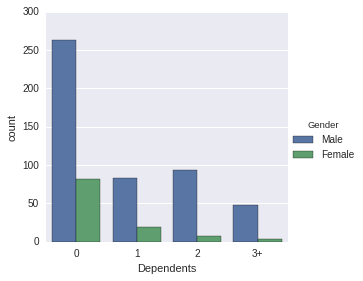

In [24]:
sns.factorplot(x='Dependents',hue='Gender',kind='count',data=train)

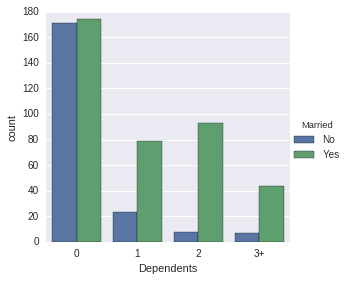

In [25]:
sns.factorplot(x='Dependents',hue='Married',kind='count',data=train)

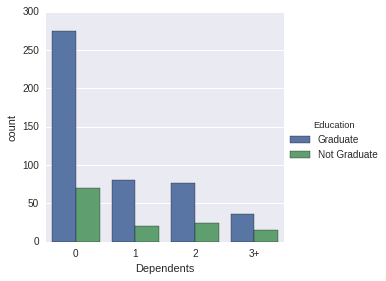

In [26]:
sns.factorplot(x='Dependents',hue='Education',kind='count',data=train)

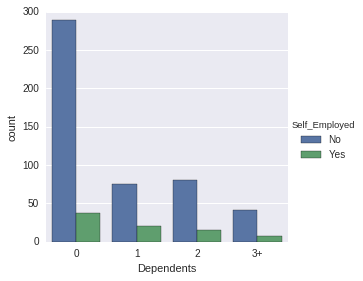

In [27]:
sns.factorplot(x='Dependents',hue='Self_Employed',kind='count',data=train)

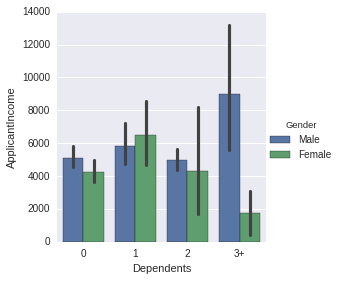

In [39]:
sns.factorplot(x='Dependents',y='ApplicantIncome',hue='Gender',data=train,kind='bar')

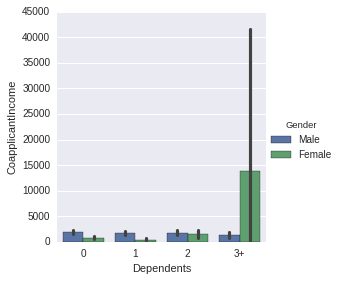

In [40]:
sns.factorplot(x='Dependents',y='CoapplicantIncome',hue='Gender',data=train,kind='bar')

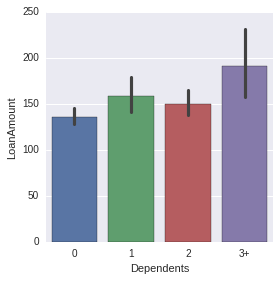

In [41]:
sns.factorplot(x='Dependents',y='LoanAmount',data=train,kind='bar')

In [44]:
train.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [8]:
train.Loan_Status = train.Loan_Status.apply(lambda x: 1 if x =='Y' else 0)

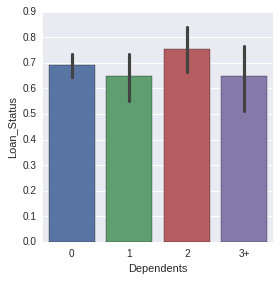

In [47]:
sns.factorplot(x = 'Dependents',y = 'Loan_Status',data=train,kind='bar')

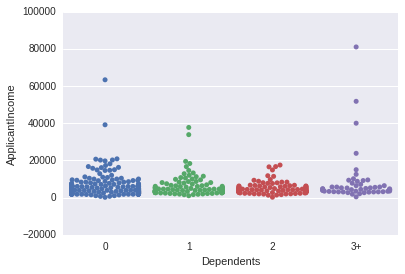

In [36]:
sns.swarmplot(x='Dependents',y='ApplicantIncome',data=train)

In [37]:
train.groupby('Dependents')['ApplicantIncome'].mean()

Dependents
0     4917.423188
1     5962.274510
2     4926.782178
3+    8581.215686
Name: ApplicantIncome, dtype: float64

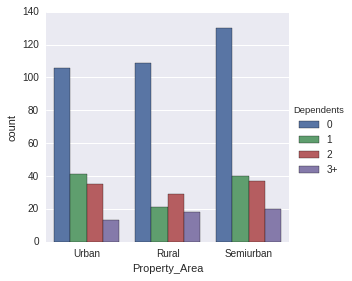

In [51]:
sns.factorplot(hue='Dependents',x='Property_Area',data=train,kind='count')

In [9]:
train['TotalIncome'] = train.ApplicantIncome + train.CoapplicantIncome

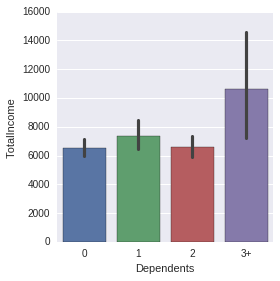

In [53]:
sns.factorplot(x = 'Dependents',y = 'TotalIncome',data=train,kind = 'bar')

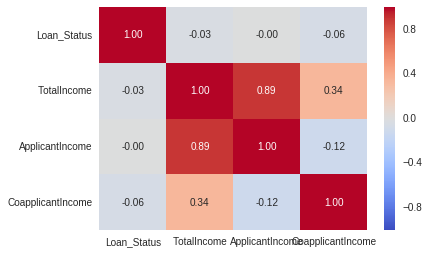

In [55]:
sns.heatmap(train[['Loan_Status','TotalIncome','ApplicantIncome','CoapplicantIncome']].corr(),annot = True , fmt="0.2f",
           cmap = 'coolwarm')

In [10]:
test['TotalIncome'] = test.ApplicantIncome + test.CoapplicantIncome

In [57]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
def fill_Dependents(row):
    if row['TotalIncome']>7000:
        return '3+'
    else:
        return '0'

In [12]:
train.loc[train.Dependents.isnull(),'Dependents'] = train.loc[train.Dependents.isnull(),:].apply(lambda row : 
                                                                                                 fill_Dependents(row)
                                                                                                ,axis=1)

In [13]:
test.loc[test.Dependents.isnull(),'Dependents'] = test.loc[test.Dependents.isnull(),:].apply(lambda row : 
                                                                                                 fill_Dependents(row)
                                                                                                ,axis=1)

## Filling the na values in Self_Employed

what are the factors with which we can say that the person self_employed
1.Gender --- mostly male people are self employed

In [70]:
train.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
train.loc[train.Self_Employed.notnull(),'Self_Employed'] = train.loc[train.Self_Employed.notnull(),
        'Self_Employed'].apply(lambda x:1 if x=='Yes' else 0)
test.loc[test.Self_Employed.notnull(),'Self_Employed'] = test.loc[test.Self_Employed.notnull(),
        'Self_Employed'].apply(lambda x:1 if x=='Yes' else 0)

In [72]:
train.Self_Employed.unique()

array([0, 1, nan], dtype=object)

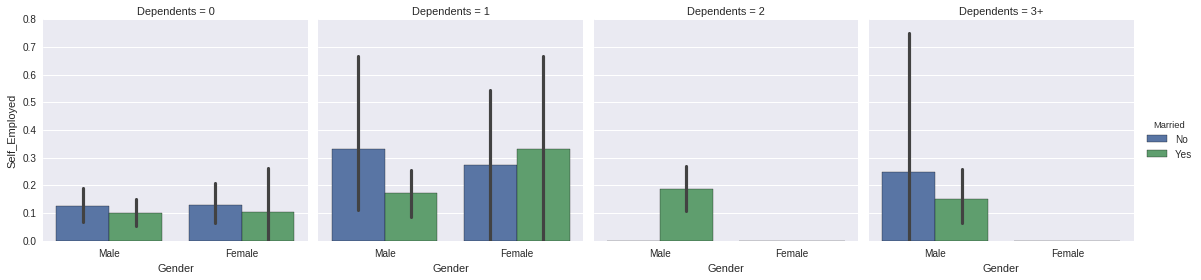

In [81]:
# lets see

sns.factorplot(x = 'Gender',y='Self_Employed',hue='Married',col='Dependents',data=train,kind='bar')

Interesting observation females with 2 or 3+ dependents are never Self Employed maybe due to the possibility that the two dependents are her husband and child

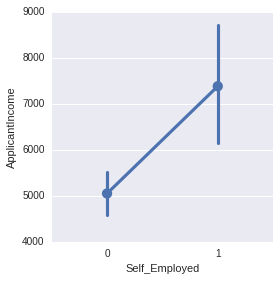

In [85]:
sns.factorplot(x='Self_Employed',y = 'ApplicantIncome',data=train)

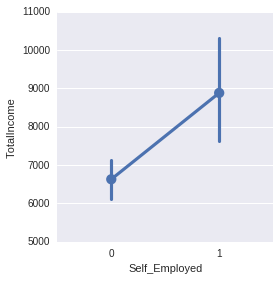

In [86]:
sns.factorplot(x='Self_Employed' , y = 'TotalIncome',data=train)

This provides are very good feature to fill Self_Employed column

In [87]:
train.Self_Employed.value_counts()

0    500
1     82
Name: Self_Employed, dtype: int64

In [15]:
def fill_SelfEmployed(row):
    if row['TotalIncome']<7000:
        return 0
    else :
        return 1

In [16]:
train.loc[train.Self_Employed.isnull(),'Self_Employed'] = train.loc[train.Self_Employed.isnull(),:].apply(lambda x:
                                                               fill_SelfEmployed(x) , axis=1)

In [17]:
test.loc[test.Self_Employed.isnull(),'Self_Employed'] = test.loc[test.Self_Employed.isnull(),:].apply(lambda x:
                                                               fill_SelfEmployed(x) , axis=1)

Filling the loan amount column
With what factors can we estimate loan amount?
1.Gender
2.Married
3.Dependents
4.Education
5.Self_Employed
....
....
...

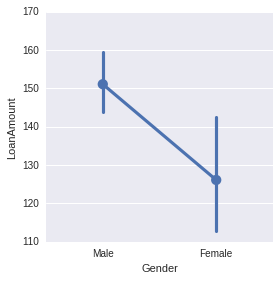

In [93]:
sns.factorplot(x='Gender',y = 'LoanAmount',data=train)

gender turns out to be a good factor

In [95]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,0,5849,0,NaN,360,1,Urban,1,5849
1,LP001003,Male,Yes,1,Graduate,0,4583,1508,128,360,1,Rural,0,6091
2,LP001005,Male,Yes,0,Graduate,1,3000,0,66,360,1,Urban,1,3000
3,LP001006,Male,Yes,0,Not Graduate,0,2583,2358,120,360,1,Urban,1,4941
4,LP001008,Male,No,0,Graduate,0,6000,0,141,360,1,Urban,1,6000


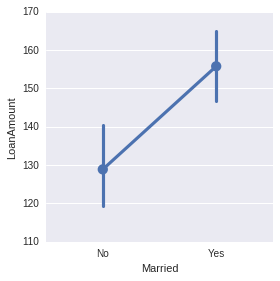

In [98]:
sns.factorplot(x='Married',y = 'LoanAmount',data=train)

Similar to the Gender column

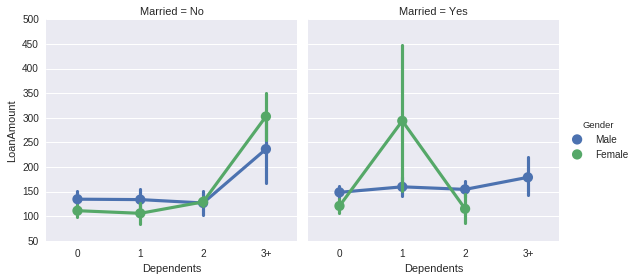

In [101]:
sns.factorplot(x='Dependents',hue='Gender',col='Married',y = 'LoanAmount',data=train)

In [103]:
train[['LoanAmount','ApplicantIncome']].corr()

,LoanAmount,ApplicantIncome
LoanAmount,1.000000,0.570909
ApplicantIncome,0.570909,1.000000


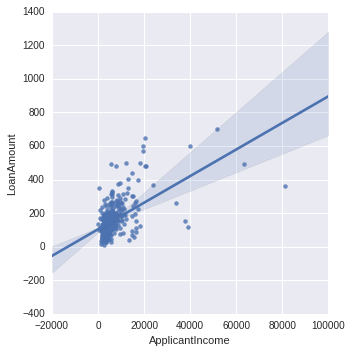

In [106]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data=train) 

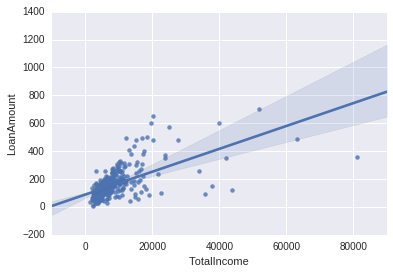

In [105]:
sns.regplot(x='TotalIncome',y='LoanAmount',data=train)

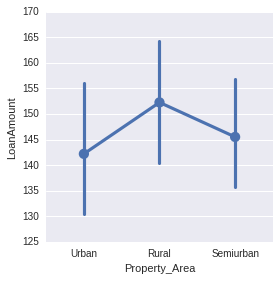

In [107]:
sns.factorplot(x='Property_Area',y='LoanAmount',data=train)

I will use Married column to impute na values in LoanAmount

In [108]:
# loan_amount_mean_married = train[train.Married=='Yes']['LoanAmount'].mean()
# loan_amount_mean_not_married = train[train.Married=='No']['LoanAmount'].mean()

# train.loc[((train.LoanAmount.isnull()) & (train.Married=='Yes')),'LoanAmount'] = loan_amount_mean_married
# train.loc[((train.LoanAmount.isnull()) & (train.Married=='No')),'LoanAmount'] = loan_amount_mean_not_married
# test.loc[((test.LoanAmount.isnull()) & (test.Married=='Yes')),'LoanAmount'] = loan_amount_mean_married
# test.loc[((test.LoanAmount.isnull()) & (test.Married=='No')),'LoanAmount'] = loan_amount_mean_not_married

Below visualization is better lets deal with it later

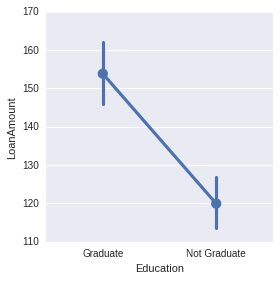

In [111]:
sns.factorplot(x='Education',y='LoanAmount',data=train)

In [18]:
train.loc[((train.LoanAmount.isnull()) & (train.Education=='Graduate')),'LoanAmount'] = 155
train.loc[((train.LoanAmount.isnull()) & (train.Education!='Graduate')),'LoanAmount'] = 120
test.loc[((test.LoanAmount.isnull()) & (test.Education=='Graduate')),'LoanAmount'] = 155
test.loc[((test.LoanAmount.isnull()) & (test.Education!='Graduate')),'LoanAmount'] = 120

For filling na terms in Loan_Amount_Term column

In [113]:
train.Loan_Amount_Term.value_counts()

360    512
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [114]:
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

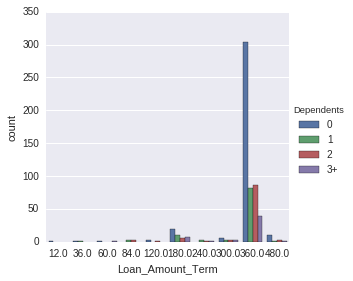

In [123]:
sns.factorplot(x='Loan_Amount_Term',hue='Dependents',data=train,kind='count')

I think its pretty safe to replace na values in Loan_Amount_Term with 360

In [19]:
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(360)
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(360)

Dealing with Credit history column

In [125]:
train.Credit_History.value_counts()

1    475
0     89
Name: Credit_History, dtype: int64

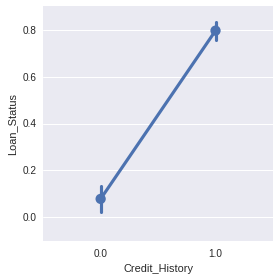

In [126]:
sns.factorplot(x='Credit_History',y='Loan_Status',data=train)

Here is the catch of the problem...
Credit History largely affects the Loan_Status column which is our target variable
So we must be careful when we impute values to the Credit_History
How can Credit_History estimated???

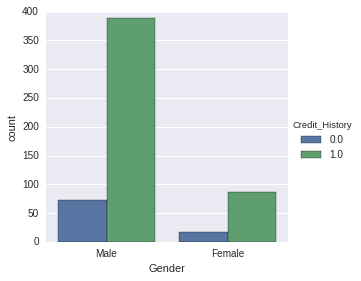

In [128]:
sns.factorplot(x='Gender',hue='Credit_History',data=train,kind='count')

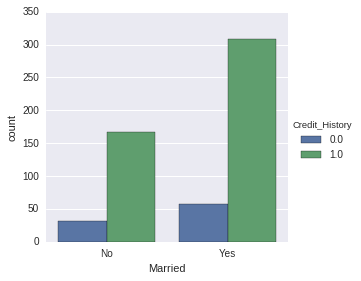

In [130]:
sns.factorplot(x='Married',hue='Credit_History',data=train,kind='count')

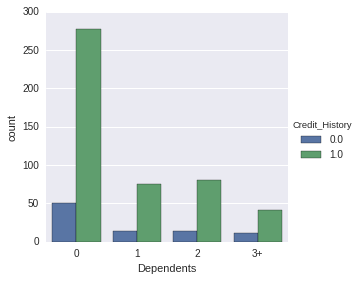

In [131]:
sns.factorplot(x='Dependents',hue='Credit_History',data=train,kind='count')

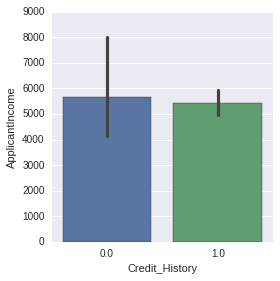

In [135]:
sns.factorplot(x='Credit_History',y='ApplicantIncome',data=train,kind='bar')

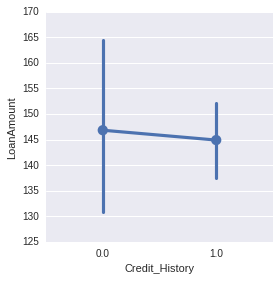

In [138]:
sns.factorplot(y='LoanAmount',x='Credit_History',data=train)

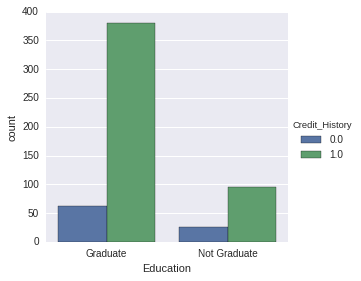

In [144]:
sns.factorplot(x='Education',hue='Credit_History',data=train,kind='count')

In [20]:
train.drop(['Credit_History','Loan_Status'],axis=1).dropna().shape

(614, 12)

We will build several models and pick the best one to fill the na values in Credit History
Its going to be a long one GOD HELP ME!!!!!!!!!!!!! :) 

In [24]:
print test.shape[0] - test.dropna().shape[0]
## which equal to na values in Credit History in test data set

29


In [25]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,0,5849,0,155,360,1,Urban,1,5849
1,LP001003,Male,Yes,1,Graduate,0,4583,1508,128,360,1,Rural,0,6091
2,LP001005,Male,Yes,0,Graduate,1,3000,0,66,360,1,Urban,1,3000
3,LP001006,Male,Yes,0,Not Graduate,0,2583,2358,120,360,1,Urban,1,4941
4,LP001008,Male,No,0,Graduate,0,6000,0,141,360,1,Urban,1,6000


In [21]:
train.Gender = train.Gender.apply(lambda x:1 if x=='Male' else 0)
test.Gender = test.Gender.apply(lambda x:1 if x=='Male' else 0)

In [22]:
train.Married = train.Married.apply(lambda x:1 if x=='Yes' else 0)
test.Married = test.Married.apply(lambda x:1 if x=='Yes' else 0)

In [23]:
train.Dependents = train.Dependents.apply(lambda x:3 if x=='3+' else x)
test.Dependents = test.Dependents.apply(lambda x:3 if x=='3+' else x)

In [24]:
train.Education = train.Education.apply(lambda x:1 if x=='Graduate' else 0)
test.Education = test.Education.apply(lambda x:1 if x=='Graduate' else 0)

In [25]:
lat_dict = {360:1,180:2,480:3,300:3}
def lat_func(x):
    if x in lat_dict.keys():
        return lat_dict[x]
    else:
        return 4

In [26]:
train.Loan_Amount_Term = train.Loan_Amount_Term.apply(lambda x:lat_func(x))
test.Loan_Amount_Term = test.Loan_Amount_Term.apply(lambda x:lat_func(x))

In [28]:
train = pd.get_dummies(train,columns=['Loan_Amount_Term','Property_Area'],prefix=['lta','pa'])
test = pd.get_dummies(test,columns=['Loan_Amount_Term','Property_Area'],prefix=['lta','pa'])

This below script is for imputing Credit History column which is very imp factor

In [38]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,TotalIncome,lta_1,lta_2,lta_3,lta_4,pa_Rural,pa_Semiurban,pa_Urban
0,LP001002,1,0,0,1,0,5849,0,155,1,1,5849,1,0,0,0,0,0,1
1,LP001003,1,1,1,1,0,4583,1508,128,1,0,6091,1,0,0,0,1,0,0
2,LP001005,1,1,0,1,1,3000,0,66,1,1,3000,1,0,0,0,0,0,1
3,LP001006,1,1,0,0,0,2583,2358,120,1,1,4941,1,0,0,0,0,0,1
4,LP001008,1,0,0,1,0,6000,0,141,1,1,6000,1,0,0,0,0,0,1


In [120]:
A = train.drop(['Loan_ID','Credit_History','Loan_Status'],axis=1)
B = test.drop(['Loan_ID','Credit_History'],axis=1)

In [121]:
A[['ApplicantIncome','CoapplicantIncome','TotalIncome']] = A[['ApplicantIncome','CoapplicantIncome','TotalIncome']].apply(lambda x: 
                                                                        np.log(1+x))

In [123]:
B[['ApplicantIncome','CoapplicantIncome','TotalIncome']] = B[['ApplicantIncome','CoapplicantIncome','TotalIncome']].apply(lambda x: 
                                                                        np.log(1+x))

In [122]:
A.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,TotalIncome,lta_1,lta_2,lta_3,lta_4,pa_Rural,pa_Semiurban,pa_Urban
0,1,0,0,1,0,8.674197,0.000000,155,8.674197,1,0,0,0,0,0,1
1,1,1,1,1,0,8.430327,7.319202,128,8.714732,1,0,0,0,1,0,0
2,1,1,0,1,1,8.006701,0.000000,66,8.006701,1,0,0,0,0,0,1
3,1,1,0,0,0,7.857094,7.765993,120,8.505525,1,0,0,0,0,0,1
4,1,0,0,1,0,8.699681,0.000000,141,8.699681,1,0,0,0,0,0,1


In [42]:
B.shape

(367, 16)

In [124]:
C = pd.concat((A,B),axis=0)

In [125]:
D = pd.concat((train.Credit_History,test.Credit_History),axis=0)

In [126]:
C = C.reset_index()

In [127]:
D = D.reset_index()

In [128]:
train_index = D[D.Credit_History.notnull()].index
test_index = D[D.Credit_History.isnull()].index

In [129]:
train_df = C.iloc[train_index]
test_df = C.iloc[test_index]
train_target = D.iloc[train_index]['Credit_History'].values

In [131]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [132]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


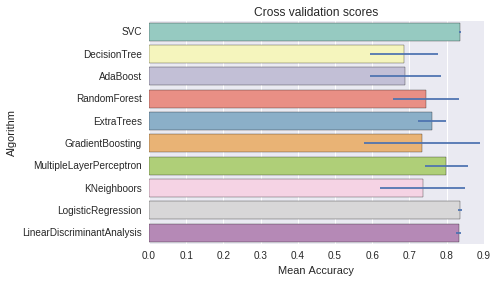

In [133]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_df, y = train_target, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Lets use SVC model to impute the missing values in Credit History column 
As it has highest accuracy and very low variance

In [134]:
Model = SVC()

In [135]:
Model.fit(train_df,train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [136]:
predictions = Model.predict(test_df)

In [137]:
predictions.shape

(79,)

Which is 50 + 29 

Yippeee !!!!!!!!!!!!!!!!!!!!!

___________________________________-
------------------------------------------------------------------------------------------------------

In [138]:
train.loc[train.Credit_History.isnull(),'Credit_History'] = predictions[:50]
test.loc[test.Credit_History.isnull(),'Credit_History'] = predictions[50:]

In [139]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,TotalIncome,lta_1,lta_2,lta_3,lta_4,pa_Rural,pa_Semiurban,pa_Urban
0,LP001002,1,0,0,1,0,5849,0,155,1,1,5849,1,0,0,0,0,0,1
1,LP001003,1,1,1,1,0,4583,1508,128,1,0,6091,1,0,0,0,1,0,0
2,LP001005,1,1,0,1,1,3000,0,66,1,1,3000,1,0,0,0,0,0,1
3,LP001006,1,1,0,0,0,2583,2358,120,1,1,4941,1,0,0,0,0,0,1
4,LP001008,1,0,0,1,0,6000,0,141,1,1,6000,1,0,0,0,0,0,1


In [140]:
real_train = train.drop(['Loan_ID','Loan_Status'],axis=1)
real_target = train['Loan_Status']

In [141]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,TotalIncome,lta_1,lta_2,lta_3,lta_4,pa_Rural,pa_Semiurban,pa_Urban
0,LP001015,1,1,0,1,0,5720,0,110,1,5720,1,0,0,0,0,0,1
1,LP001022,1,1,1,1,0,3076,1500,126,1,4576,1,0,0,0,0,0,1
2,LP001031,1,1,2,1,0,5000,1800,208,1,6800,1,0,0,0,0,0,1
3,LP001035,1,1,2,1,0,2340,2546,100,1,4886,1,0,0,0,0,0,1
4,LP001051,1,0,0,0,0,3276,0,78,1,3276,1,0,0,0,0,0,1


In [142]:
real_test = test.drop('Loan_ID',axis=1)

In [143]:
print real_train.shape
print real_test.shape

(614, 17)
(367, 17)


In [144]:
print real_train.dropna().shape
print real_test.dropna().shape

(614, 17)
(367, 17)


In [146]:
real_train[['ApplicantIncome','CoapplicantIncome','TotalIncome']] = real_train[['ApplicantIncome','CoapplicantIncome','TotalIncome']].apply(lambda x: 
                                                                        np.log(1+x))
real_test[['ApplicantIncome','CoapplicantIncome','TotalIncome']] = real_test[['ApplicantIncome','CoapplicantIncome','TotalIncome']].apply(lambda x: 
                                                                        np.log(1+x))

/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


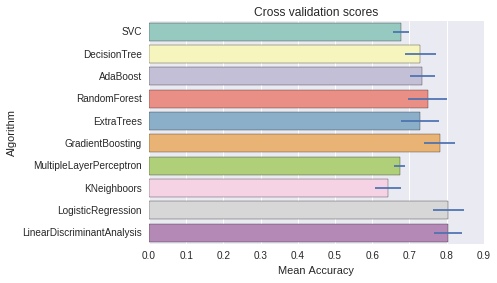

In [148]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, real_train, y = real_target, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Logistic Regression does a good job here
Lets pick it and submit a solution 

In [149]:
Model1 = LogisticRegression()

In [150]:
Model1.fit(real_train,real_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
pred= Model1.predict(real_test)

In [162]:
pred = pred.astype(str)

In [163]:
pred[pred=='1'] = 'Y'

In [164]:
pred[pred=='0'] = 'N'

In [167]:
test['Loan_Status'] = pred

In [169]:
test[['Loan_ID','Loan_Status']].to_csv('goodwork.csv',index=False)

In [38]:
print train_sub.shape[0] - train_sub.dropna().shape[0]

0


In [39]:
print target_sub.shape[0] - target_sub.dropna().shape[0]

50


In [40]:
train_sub = pd.concat((train_sub,target_sub),axis=1)

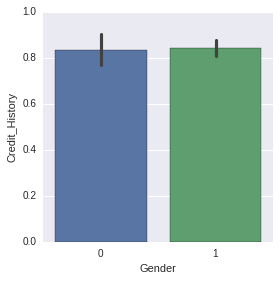

In [46]:
sns.factorplot(x = 'Gender',y='Credit_History',data=train_sub,kind='bar')

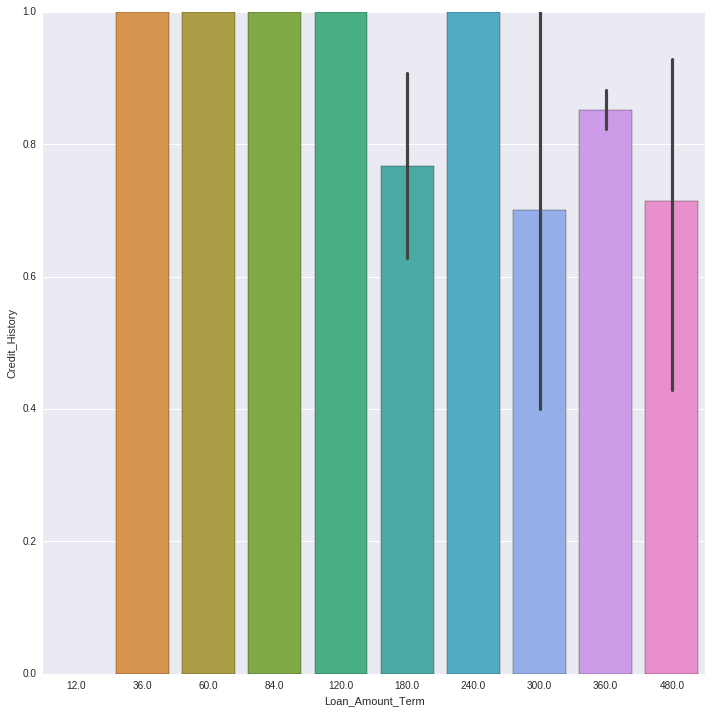

In [53]:
sns.factorplot(x='Loan_Amount_Term',y = 'Credit_History',data=train_sub , kind='bar',size=10)

In [ ]:
train_sub.Loan_Amount_Term = train.Loan_Amount_Term.apply(lambda x: lat_func(x))

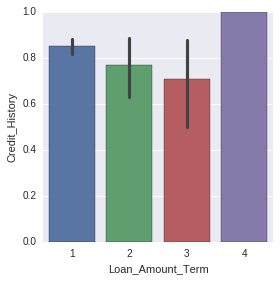

In [61]:
sns.factorplot(x='Loan_Amount_Term',y='Credit_History',data=train_sub,kind='bar')

In [62]:
train_sub = pd.get_dummies(train_sub , columns=['Loan_Amount_Term'] , prefix = 'lat')

In [63]:
train_sub.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,TotalIncome,Credit_History,lat_1,lat_2,lat_3,lat_4
0,1,0,0,1,0,5849,0,155,5849,1,1,0,0,0
1,1,1,1,1,0,4583,1508,128,6091,1,1,0,0,0
2,1,1,0,1,1,3000,0,66,3000,1,1,0,0,0
3,1,1,0,0,0,2583,2358,120,4941,1,1,0,0,0
4,1,0,0,1,0,6000,0,141,6000,1,1,0,0,0


In [64]:
test = pd.get_dummies(test,columns=['Loan_Amount_Term'] , prefix = 'lat')

In [65]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,TotalIncome,lat_1,lat_2,lat_3,lat_4
0,LP001015,1,1,0,1,0,5720,0,110,1,Urban,5720,1,0,0,0
1,LP001022,1,1,1,1,0,3076,1500,126,1,Urban,4576,1,0,0,0
2,LP001031,1,1,2,1,0,5000,1800,208,1,Urban,6800,1,0,0,0
3,LP001035,1,1,2,1,0,2340,2546,100,NaN,Urban,4886,1,0,0,0
4,LP001051,1,0,0,0,0,3276,0,78,1,Urban,3276,1,0,0,0


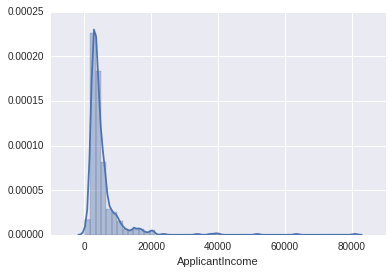

In [32]:
sns.distplot(train.ApplicantIncome)

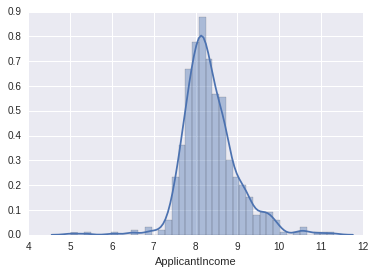

In [33]:
sns.distplot(train.ApplicantIncome.apply(lambda x: np.log(1+x)))

------------------------------------------------------------
-----------------------------------------------------------
--------------------------------------------------------------
------------------------------------------------------------


In [110]:
train.Loan_Amount_Term.value_counts()

360    512
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [77]:
train.groupby(['Gender','Self_Employed'])['Loan_ID'].count()

Gender  Self_Employed
Female  0                 91
        1                 15
Male    0                409
        1                 67
Name: Loan_ID, dtype: int64

Gender is not helping much here

In [ ]:
# lets see the married column
# lets see

sns.factorplot(x = 'Married',y='Self_Employed',data=train,kind='bar')

In [22]:
print train.Gender.shape[0] - train.Gender.dropna().shape[0]

13


In [62]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [64]:
train.Loan_Status = train.Loan_Status.apply(lambda x:1 if x=='Y' else 0)

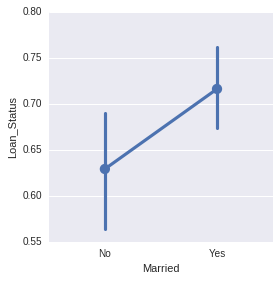

In [68]:
sns.factorplot(x='Married',y='Loan_Status',data=train,type='sum')

In [72]:
train.groupby(['Married','Loan_Status'])['Loan_ID'].count()

Married  Loan_Status
No       0               79
         1              134
Yes      0              113
         1              285
Name: Loan_ID, dtype: int64

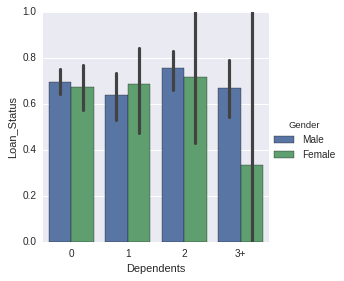

In [78]:
sns.factorplot(x = 'Dependents' , y = 'Loan_Status',hue='Gender',data=train,kind='bar')

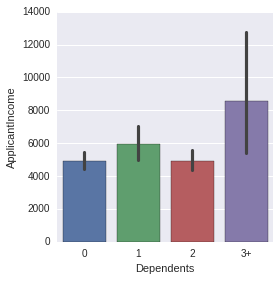

In [80]:
sns.factorplot(x = 'Dependents' , y = 'ApplicantIncome',data=train,kind='bar')

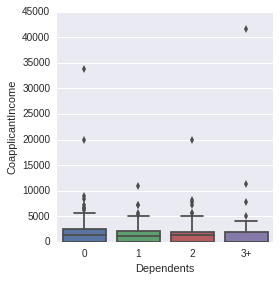

In [82]:
sns.factorplot(x='Dependents',y = 'CoapplicantIncome',data=train,kind='box')

In [13]:
train.groupby(by=['Credit_History','Loan_Status'])['Loan_ID'].count()

Credit_History  Loan_Status
0               N               82
                Y                7
1               N               97
                Y              378
Name: Loan_ID, dtype: int64

In [166]:
train.Gender = train.Gender.fillna('Male')
test.Gender = test.Gender.fillna('Male')

In [167]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [168]:
train.Married = train.Married.fillna('Yes')
test.Married = test.Married.fillna('Yes')

In [169]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [170]:
train.Dependents = train.Dependents.fillna(0)
test.Dependents = test.Dependents.fillna(0)

In [171]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [172]:
train.Self_Employed = train.Self_Employed.fillna('No')
test.Self_Employed = test.Self_Employed.fillna('No')

In [173]:
loan_amount_mean = train.LoanAmount.mean()

In [174]:
train.LoanAmount = train.LoanAmount.fillna(loan_amount_mean)
test.LoanAmount = test.LoanAmount.fillna(loan_amount_mean)

In [175]:
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(360)
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(360)

In [176]:
train.Credit_History = train.Credit_History.fillna(1)
test.Credit_History = test.Credit_History.fillna(1)

In [177]:
print train.shape
print train.dropna().shape

(614, 13)
(614, 13)


In [178]:
print test.shape
print test.dropna().shape

(367, 12)
(367, 12)


In [179]:
train = train.drop('Loan_Status',axis=1)

In [180]:
total = pd.concat((train,test),axis=0)

In [181]:
total.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0,146.412162,360,1,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360,1,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360,1,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360,1,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360,1,Urban


In [182]:
total = total.drop('Loan_ID',axis=1)

In [183]:
total.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [184]:
total.Gender = total.Gender.apply(lambda x:1 if x=='Male' else 0)

In [185]:
total.Married.unique()

array(['No', 'Yes'], dtype=object)

In [186]:
total.Married = total.Married.apply(lambda x:1 if x=='Yes' else 0)

In [187]:
total.Dependents.unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [188]:
total.Dependents = total.Dependents.apply(lambda x:3 if x=='3+' else x)

In [189]:
total.Dependents.unique()

array(['0', '1', '2', 3, 0], dtype=object)

In [190]:
total.Dependents = total.Dependents.astype(int)
total.Dependents = total.Dependents.apply(lambda x:1 if x==0 else 0)

In [191]:
total.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [192]:
total.Education = total.Education.apply(lambda x:1 if x=='Graduate' else 0)

In [193]:
total.Education.unique()

array([1, 0])

In [194]:
total.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [195]:
total.Self_Employed = total.Self_Employed.apply(lambda x:1 if x=='Yes' else 0)

In [196]:
total.Self_Employed.unique()

array([0, 1])

In [197]:
Loan_amount_dummies = pd.get_dummies(total.Loan_Amount_Term,prefix = 'la')

In [198]:
total = total.drop('Loan_Amount_Term',axis=1)

In [199]:
# total = pd.concat((total,Loan_amount_dummies),axis=1)

In [200]:
property_area_dummies = pd.get_dummies(total.Property_Area,prefix='tp')

In [201]:
total = total.drop('Property_Area',axis=1)

In [202]:
total = pd.concat((total,property_area_dummies),axis=1)

In [203]:
train_size = train.shape[0]

In [204]:
A = total.iloc[:train_size,:]
B = total.iloc[train_size: , :]

In [205]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [206]:
A = scaler.fit_transform(A)
B = scaler.transform(B)

In [2]:
from sklearn.cross_validation import StratifiedKFold()

SyntaxError: invalid syntax (<ipython-input-2-6ed220ed773b>, line 1)

In [207]:
target = pd.read_csv('train.csv')
target = target.Loan_Status

In [208]:
import xgboost

In [209]:
Model = xgboost.XGBClassifier()

In [210]:
Model.fit(A,target)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [211]:
pred = Model.predict(B)

In [212]:
O = pd.read_csv('sample_sub.csv')

In [213]:
O.Loan_ID = test.Loan_ID
O.Loan_Status = pred

In [214]:
O.to_csv('beter_fearures_xgb_classifier.csv',index=False)